In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

In [3]:
# Importing the dataset
dataset = pd.read_csv('AB_NYC_2019.csv')
del dataset['host_id'], dataset['last_review'], dataset['host_name']
del dataset['latitude'], dataset['longitude'], dataset['calculated_host_listings_count']
dataset = dataset.rename(columns={"id": "ID",
                                  "name": "Name",
                                  "neighbourhood_group": "Borough",
                                  "neighbourhood": "Neighborhood",
                                  "room_type": "Room_Type",
                                  "price": "Price",
                                  "minimum_nights": "Minimum_Nights",
                                  "number_of_reviews":"Num_of_Reviews",
                                  "reviews_per_month": "Reviews_per_Month",
                                  "availability_365": "Days_Available_A_Year"})
dataset

,ID,Name,Borough,Neighborhood,Room_Type,Price,Minimum_Nights,Num_of_Reviews,Reviews_per_Month,Days_Available_A_Year
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,Private room,149,1,9,0.21,365
1,2595,Skylit Midtown Castle,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room,150,3,0,NaN,365
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,129
6,5121,BlissArtsSpace!,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,0.40,0
7,5178,Large Furnished Room Near B'way,Manhattan,Hell's Kitchen,Private room,79,2,430,3.47,220
8,5203,Cozy Clean Guest Room - Family Apt,Manhattan,Upper West Side,Private room,79,2,118,0.99,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,Manhattan,Chinatown,Entire home/apt,150,1,160,1.33,188


In [10]:
#Can we predict availability and maybe number of reviews based on price?
#Can we predict price of listing by room type and NYC borough??

#Examine AirBnB listings that are either available either 365 days a year or 0 days
availability = [0, 365]
dataset.Days_Available_A_Year.isin(availability)
new_dataset = dataset[dataset.Days_Available_A_Year.isin(availability)]

new_dataset

,ID,Name,Borough,Neighborhood,Room_Type,Price,Minimum_Nights,Num_of_Reviews,Reviews_per_Month,Days_Available_A_Year
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,Private room,149,1,9,0.21,365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room,150,3,0,NaN,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,0
6,5121,BlissArtsSpace!,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,0.40,0
8,5203,Cozy Clean Guest Room - Family Apt,Manhattan,Upper West Side,Private room,79,2,118,0.99,0
14,6090,West Village Nest - Superhost,Manhattan,West Village,Entire home/apt,120,90,27,0.22,0
20,7801,Sweet and Spacious Brooklyn Loft,Brooklyn,Williamsburg,Entire home/apt,299,3,9,0.07,0
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Manhattan,Inwood,Private room,80,4,0,NaN,0
36,11452,Clean and Quiet in Brooklyn,Brooklyn,Bedford-Stuyvesant,Private room,35,60,0,NaN,365
38,11943,Country space in the city,Brooklyn,Flatbush,Private room,150,1,0,NaN,365


In [4]:
#Counting the number of unique room types listed
room_types = dataset.groupby(['Room_Type']).count()
room_types['ID']

Room_Type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: ID, dtype: int64

In [5]:
#Counting the boroughs listed 
boroughs = dataset.groupby(['Borough']).count()
boroughs['ID']

Borough
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: ID, dtype: int64

In [6]:
#What are the most common type of AirBnBs in NYC?
#Which boroughs have the most AirBnBs and why?

## Number of room type listings available by NYC borough
boroughs_roomtype = dataset.groupby(['Borough', 'Room_Type']).count()
#boroughs_roomtype = boroughs_roomtype["ID"]

boroughs_roomtype_df = pd.DataFrame(boroughs_roomtype, columns = ['ID'])
boroughs_roomtype_df

ID
Borough       Room_Type             
Bronx         Entire home/apt    379
              Private room       652
              Shared room         60
Brooklyn      Entire home/apt   9559
              Private room     10132
              Shared room        413
Manhattan     Entire home/apt  13199
              Private room      7982
              Shared room        480
Queens        Entire home/apt   2096
              Private room      3372
              Shared room        198
Staten Island Entire home/apt    176
              Private room       188
              Shared room          9

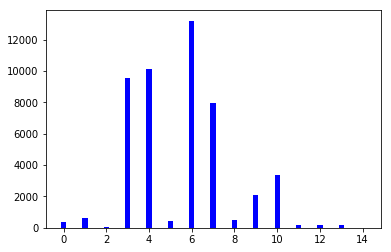

In [7]:
#Matplotlib
Boroughs = np.arange(len(boroughs_roomtype_df))
entire_home = boroughs_roomtype_df["ID"]
width = 0.25

fig = plt.figure()
ax = fig.add_subplot(111)

room_type_count = ax.bar(Boroughs, entire_home, width, color = "blue")



In [11]:
new_dataset = pd.DataFrame(new_dataset.head(100))
#del new_dataset['Minimum_Nights']

new_dataset

,ID,Name,Borough,Neighborhood,Room_Type,Price,Minimum_Nights,Num_of_Reviews,Reviews_per_Month,Days_Available_A_Year
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,Private room,149,1,9,0.21,365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room,150,3,0,NaN,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,0
6,5121,BlissArtsSpace!,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,0.40,0
8,5203,Cozy Clean Guest Room - Family Apt,Manhattan,Upper West Side,Private room,79,2,118,0.99,0
14,6090,West Village Nest - Superhost,Manhattan,West Village,Entire home/apt,120,90,27,0.22,0
20,7801,Sweet and Spacious Brooklyn Loft,Brooklyn,Williamsburg,Entire home/apt,299,3,9,0.07,0
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Manhattan,Inwood,Private room,80,4,0,NaN,0
36,11452,Clean and Quiet in Brooklyn,Brooklyn,Bedford-Stuyvesant,Private room,35,60,0,NaN,365
38,11943,Country space in the city,Brooklyn,Flatbush,Private room,150,1,0,NaN,365


In [12]:
#Can we predict availability and maybe number of reviews based on price?
X = new_dataset.iloc[:,[5,7]].values
y = new_dataset.iloc[:, 9].values


In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Irwin\anaconda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Irwin\anaconda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Irwin\anaconda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[23,  0],
       [ 2,  0]], dtype=int64)

In [16]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


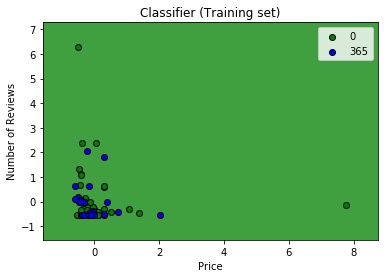

In [17]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], edgecolor = 'black',
                c = ListedColormap(('green', 'blue'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


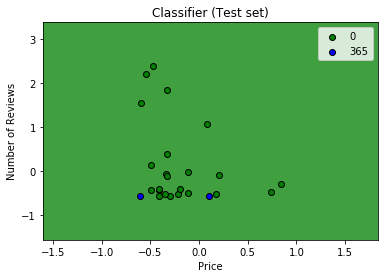

In [21]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], edgecolor = 'black',
                c = ListedColormap(('green', 'blue'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()

In [22]:
#Can we predict price of listing by room type and NYC borough??
# Do Manhattan and Brooklyn 
# dummy variable encoding because its a categorical variable
boroughs = ["Manhattan", "Brooklyn"]
dataset.Borough.isin(boroughs)
borough_dataset = dataset[dataset.Borough.isin(boroughs)]

borough_dataset

,ID,Name,Borough,Neighborhood,Room_Type,Price,Minimum_Nights,Num_of_Reviews,Reviews_per_Month,Days_Available_A_Year
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,Private room,149,1,9,0.21,365
1,2595,Skylit Midtown Castle,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room,150,3,0,NaN,365
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,129
6,5121,BlissArtsSpace!,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,0.40,0
7,5178,Large Furnished Room Near B'way,Manhattan,Hell's Kitchen,Private room,79,2,430,3.47,220
8,5203,Cozy Clean Guest Room - Family Apt,Manhattan,Upper West Side,Private room,79,2,118,0.99,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,Manhattan,Chinatown,Entire home/apt,150,1,160,1.33,188


In [4]:
#Attempt a Decision Tree
#Try and predict the availability of all listings of all availabilities
X_2 = dataset.iloc[:, 5:6].values
y_2 = dataset.iloc[:, 9].values

In [6]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_2, y_2)

# Predicting a new result
y_pred = regressor.predict([[6.5]])

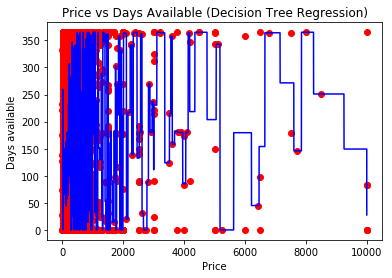

In [11]:
# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X_2), max(X_2), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_2, y_2, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Price vs Days Available (Decision Tree Regression)')
plt.xlabel('Price')
plt.ylabel('Days available')
plt.show()
